<a href="https://colab.research.google.com/github/wsj20010128/ML_Notes/blob/main/Gradient-Descent/02-Implement-Gradient-Descent-in-Linear-Regression/02-Implement-Gradient-Descent-in-Linear-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement Gradint Descent in Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [ ]:
X = x.reshape(-1, 1)

In [ ]:
X.shape

(100, 1)

In [ ]:
y.shape

(100,)

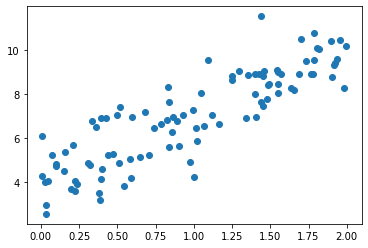

In [ ]:
plt.scatter(x, y)
plt.show()

## Train Model with Gradient Descent
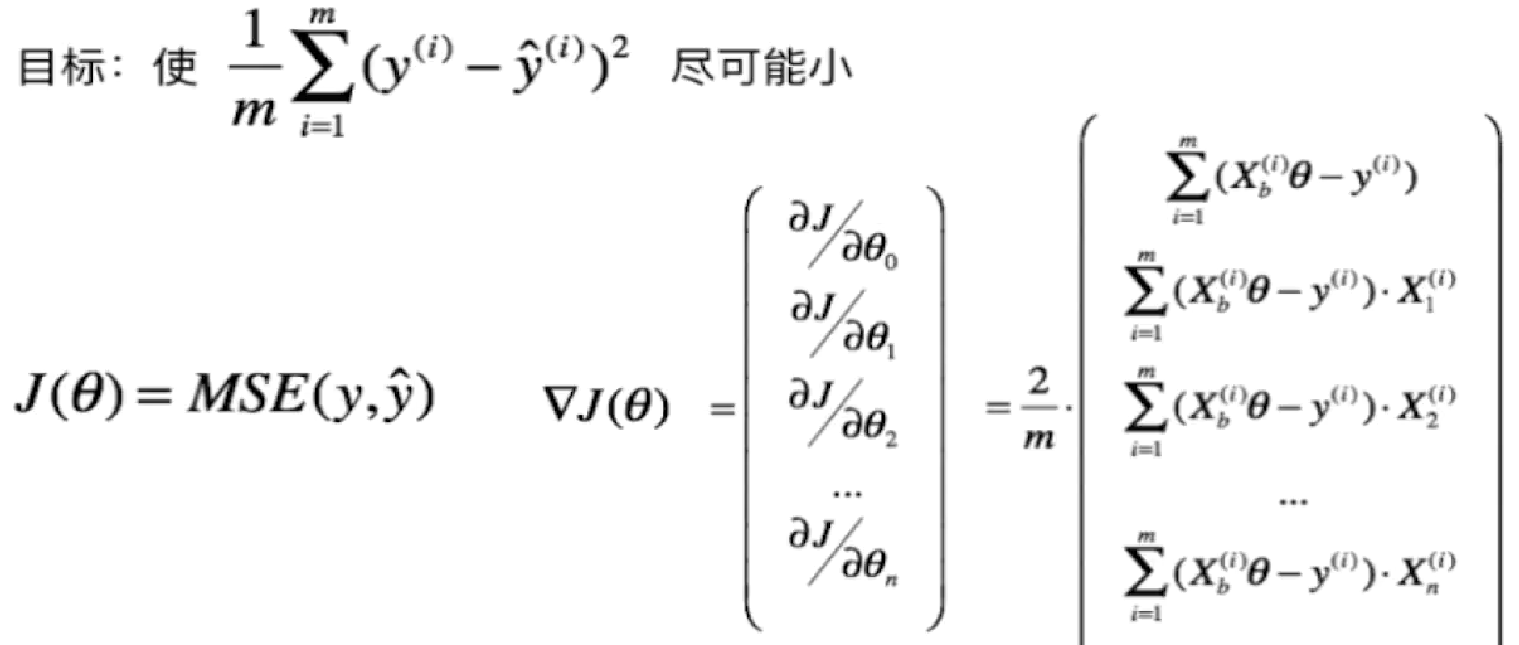

In [8]:
def J(theta, X_b, y):
  try:
    return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
  except:
    return float('inf')

In [9]:
def dJ(theta, X_b, y):
  res = np.empty(len(theta))
  res[0] = np.sum(X_b.dot(theta) - y)
  for i in range(1, len(theta)):
    res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
  return res * 2 / len(X_b)

In [17]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):

  theta = initial_theta
  cur_iter = 0

  while cur_iter < n_iters:
      gradient = dJ(theta, X_b, y)
      last_theta = theta
      theta = theta - eta * gradient
      if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
          break
            
      cur_iter += 1

  return theta

In [18]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [19]:
theta

array([4.02145786, 3.00706277])

## Package Linear Regression Algorithm

In [23]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

In [24]:
lin_reg.coef_

array([3.00517934])

In [25]:
lin_reg.intercept_

4.023690891597359